# YZV 211E 
# Homework 2
### Prepared by Res. Asst. Yaren Yılmaz
yilmazy20@itu.edu.tr

In this assignment, you'll dive into the Olympic medalists dataset, using different visualization techniques to uncover patterns and connections. Each question invites you to choose the right visualization method, pushing you to think critically about representing complex data effectively. The aim is to deepen your understanding of data visualization principles and inspire creative, insightful interpretations of the dataset. 

* If you need you can implement data cleaning/preparation steps before data visualization.

* Do not use the same visualization method for each question, try to choose different techniques among the most appropriate ones.
,
* If any data processing steps are required before visualization, solve these problems as efficiently as possible with pandas. Avoid using unnecessary loops.
  
* Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.
  
* Since this is a visualization assignment, in addition to giving the correct answer, you will also be evaluated on visual details (titles, naming, legend, etc.)

**Important:**
* **Run the notebooks before the submission.**

In [1]:
# You can use the following libraries if you need them.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset:** Download the dataset from [here](https://github.com/kalilurrahman/dataset/blob/main/Summer-Olympic-medals-1976-to-2008.csv). This dataset is a list of all the medal winners in the Summer Olympics from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period.

In [19]:
#Read CSV File 
path = 'Summer-Olympic-medals-1976-to-2008.csv' # Give your own path
df = pd.read_csv(path,encoding="ISO-8859-1")
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


### Q1 Temporal Analysis of Medal Wins (20 points):
* Explore the temporal patterns of medal wins for top 10 country wity the highest number of medals. Choose an appropriate visualization method to illustrate how the selected countries' medal counts have changed over time.
* Use pandas functions for data preparation and try to avoid the usage of unnecessary loops.
* Discuss any patterns you observe.

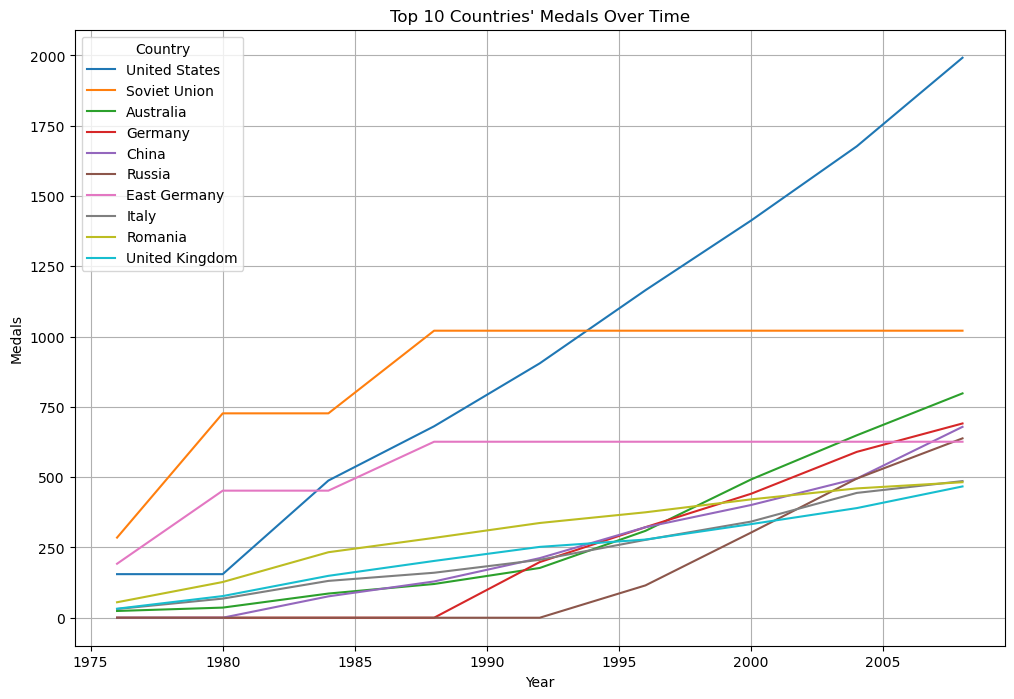

,United States,Soviet Union,Australia,Germany,China,Russia,East Germany,Italy,Romania,United Kingdom
Year,,,,,,,,,,
1976.0,155.0,285.0,24,0.0,0.0,0.0,192.0,31,55,32
1980.0,155.0,727.0,36,0.0,0.0,0.0,452.0,68,127,77
1984.0,488.0,727.0,86,0.0,76.0,0.0,452.0,131,233,149
1988.0,681.0,1021.0,120,0.0,129.0,0.0,626.0,160,284,202
1992.0,905.0,1021.0,177,198.0,212.0,0.0,626.0,206,337,252
1996.0,1165.0,1021.0,309,322.0,322.0,115.0,626.0,277,375,278
2000.0,1413.0,1021.0,492,441.0,401.0,303.0,626.0,342,421,333
2004.0,1677.0,1021.0,649,590.0,495.0,495.0,626.0,444,460,390
2008.0,1992.0,1021.0,798,691.0,679.0,638.0,626.0,486,482,467


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = df.dropna()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by "Country" and counting the number of medals for each country
result = df.groupby("Country")["Medal"].count()
result = result.sort_values(ascending=False)
CountryNames = list(result.head(10).keys())

# Initializing an empty list to store cumulative medal counts for each country over time
ghost = []

# Calculating cumulative medal counts for each of the top 10 countries by year
for i in CountryNames:
    temp = df[df["Country"] == i].groupby("Year")["Country"].count().cumsum()
    ghost.append(temp)

# Concatenating the cumulative medal counts for all countries into a single DataFrame
result = pd.concat(ghost, axis=1)
result.columns = CountryNames
result.sort_index(inplace=True)

# Filling NaN values in the DataFrame with forward fill and zero
result.fillna(method="ffill", inplace=True)
result.fillna(value=0, inplace=True)

# Setting a larger figure size
plt.figure(figsize=(12, 8))

# Plotting a line plot for the top 10 countries' medals over time
sns.lineplot(data=result, dashes=False)
plt.title("Top 10 Countries' Medals Over Time")
plt.xlabel('Year')
plt.ylabel('Medals')
plt.legend(title='Country')
plt.grid(True)
plt.show()

result


**Your Answer:** Descengin order of the top 10 countries with the most medals : United States, the Soviet Union, Australia, Germany, China, Russia, East Germany, Italy, Romania, and the United Kingdom.

### Q2 Top 10 Gold Winner Countries (20 points)
* Visualize the 10 countries with the highest number of gold medals. You can choose any appropriate chart type. The chart should show the number of gold medals.
* Interpret the result.

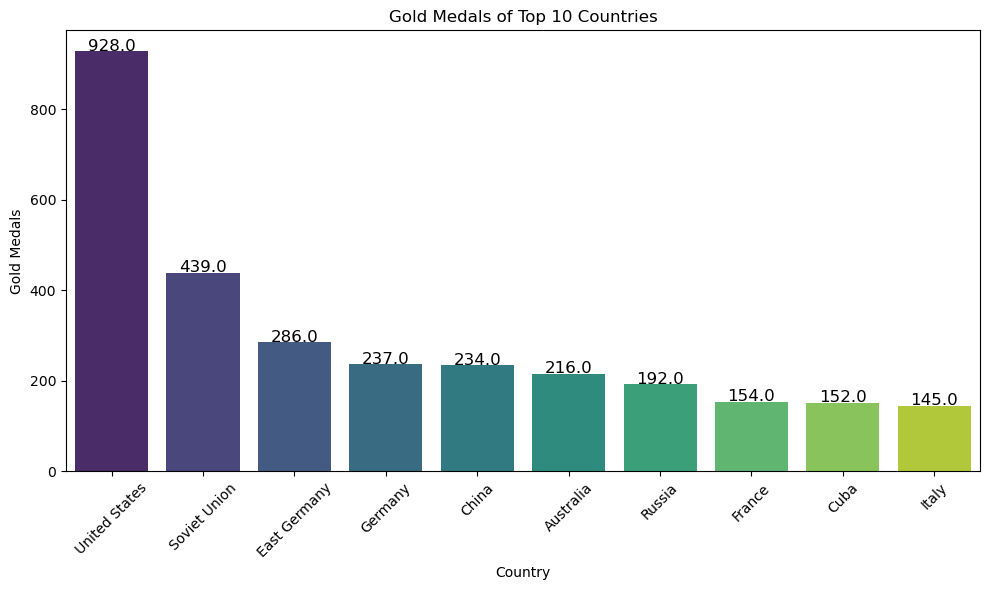

,United States,Soviet Union,East Germany,Germany,China,Australia,Russia,France,Cuba,Italy
Year,,,,,,,,,,
2008.0,928.0,439.0,286.0,237.0,234.0,216.0,192.0,154,152.0,145


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering the dataframe to include only rows where the "Medal" column has the value "Gold"
df = df[df["Medal"] == "Gold"]

# Counting the number of gold medals for each country and selecting the top 10 countries
result = df.groupby("Country")["Medal"].count()
result = result.sort_values(ascending=False)
CountryNames = list(result.head(10).keys())

# Initializing a list to store cumulative medal counts for each country over time
ghost = []

# Calculating cumulative medal counts for each of the top 10 countries by year
for i in CountryNames:
    temp = df[df["Country"] == i].groupby("Year")["Country"].count().cumsum()
    ghost.append(temp)

# Concatenating the cumulative medal counts for all countries into a single DataFrame
result = pd.concat(ghost, axis=1)
result.columns = CountryNames
result.sort_index(inplace=True)
result.fillna(method="ffill", inplace=True)
result.fillna(value=0, inplace=True)
result = result.tail(1)

# Creating the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=result.columns, y=result.values.flatten(), palette='viridis')

# Adding exact values as text labels on each bar
for index, value in enumerate(result.values.flatten()):
    bar_plot.text(index, value + 0.5, str(value), ha='center', color='black', fontsize=12)

# Customizing plot labels, title, rotation, and layout
plt.xlabel('Country')
plt.ylabel('Gold Medals')
plt.title('Gold Medals of Top 10 Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

result


**Your Answer:** Descending Order : United States, Soviet Union, East Germany, Germany, China, Australia, Russia, France, Cuba, Italy.

### Q3 Discipline Diversity in Successful Countries (20 points):
* Create a visualization that represents the diversity of disciplines in which the 10 countries with the most medals. Sort the countries by the total number of medals in descending order.
* Discuss any correlation between a country's success and its range of disciplines.

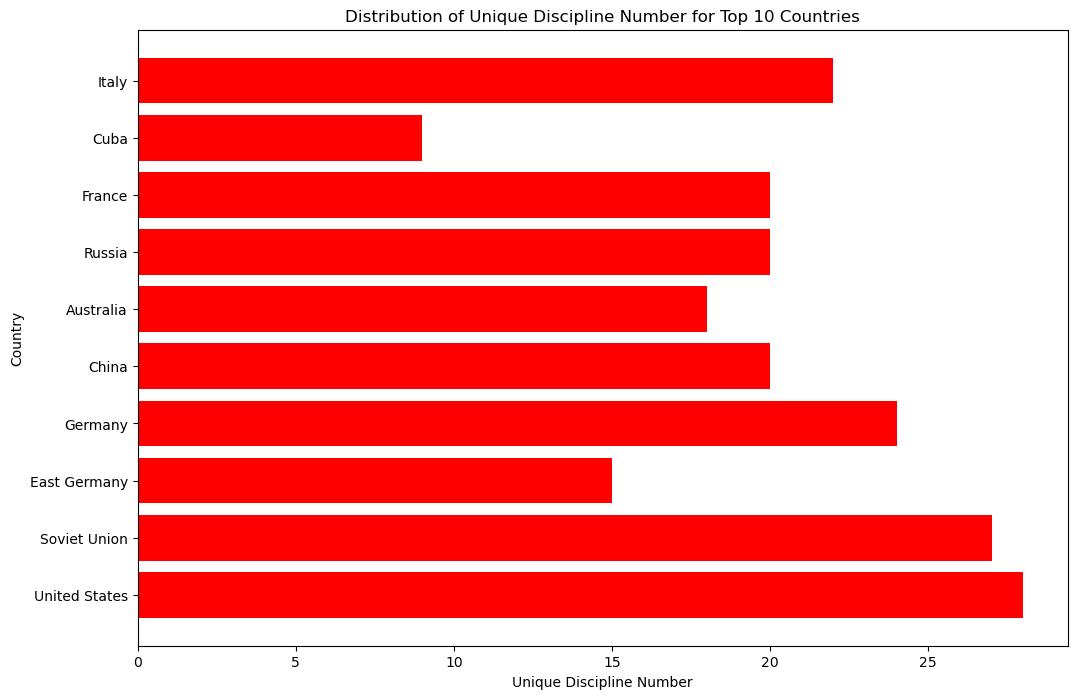

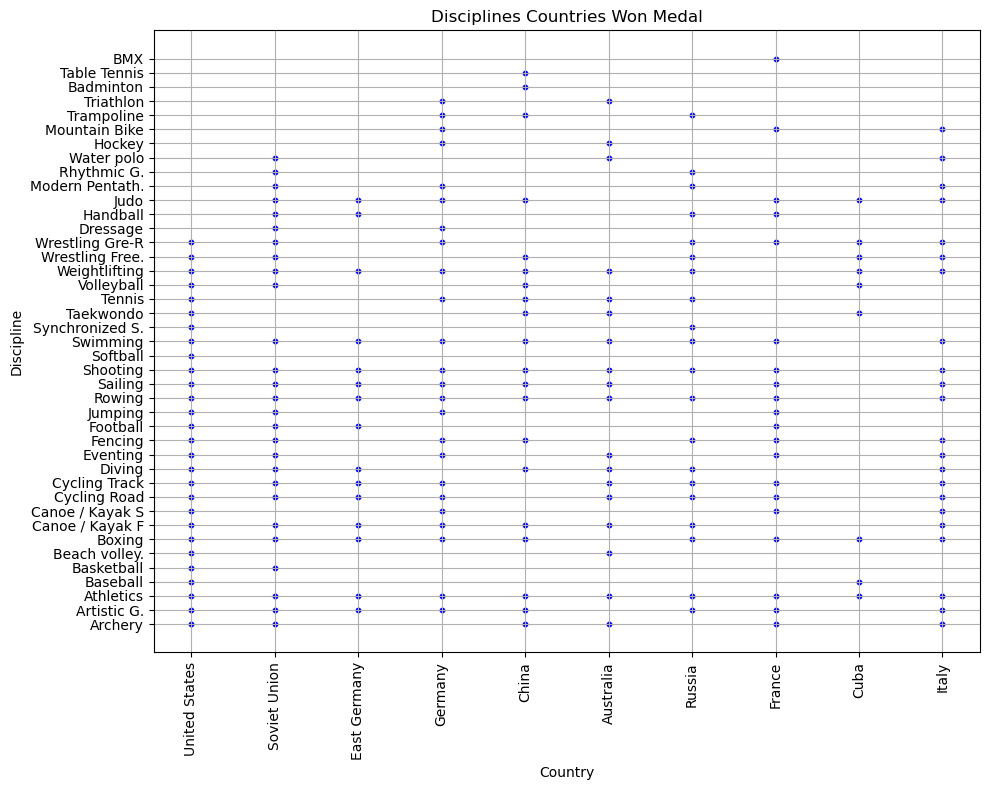

In [29]:
result = df.groupby("Country")["Medal"].count()  # Counting medals for each country
result = result.sort_values(ascending=False)  # Sorting the result in descending order
CountryNames = list(result.head(10).keys())  # Selecting top 10 countries with the most medals

ghost = []
temp = pd.DataFrame()

# Calculating unique disciplines each country won medals in
for i in CountryNames:
    temp = df[df["Country"] == i].groupby("Discipline")["Country"].nunique()
    ghost.append(temp)

result = pd.concat(ghost, axis=1)  # Concatenating the results for each country and discipline
result.columns = CountryNames  # Naming columns with country names
result.fillna(value=0, inplace=True)  # Filling NaN values with 0

last = pd.DataFrame()

# Calculating the total number of unique disciplines for each of the top 10 countries
last["CountryName"] = CountryNames
last["Total"] = result.sum(axis=0).values

# Plotting a horizontal bar chart to display the distribution of unique disciplines for top countries
plt.figure(figsize=(12, 8))
plt.barh(last["CountryName"], last["Total"], color='red', label='Diversity Number')

plt.xlabel('Unique Discipline Number')
plt.ylabel('Country')
plt.title('Distribution of Unique Discipline Number for Top 10 Countries')
plt.show()



#Also we can use the see that disciplines that what it is in other graph.

plt.figure(figsize=(10, 8))
for i, country in enumerate(result.columns):
    for j, val in enumerate(result.index):
        if result[country][j] == 1:
            plt.scatter(i, j, marker='o', color='blue', s=10)

plt.xticks(range(len(result.columns)), result.columns, rotation=90)
plt.yticks(range(len(result.index)), result.index)

plt.xlabel('Country')
plt.ylabel('Discipline')
plt.title('Disciplines Countries Won Medal')
plt.grid()

plt.tight_layout()
plt.show()



**Write here:** The nation with the most medals, the United States, excels in the most diverse fields. 


### Q4 Female Gender Distribution Across Sports (20 points):
* Investigate the gender distribution (in percentage) in each sport. Choose the most suitable visualization method.
* Discuss any notable result.

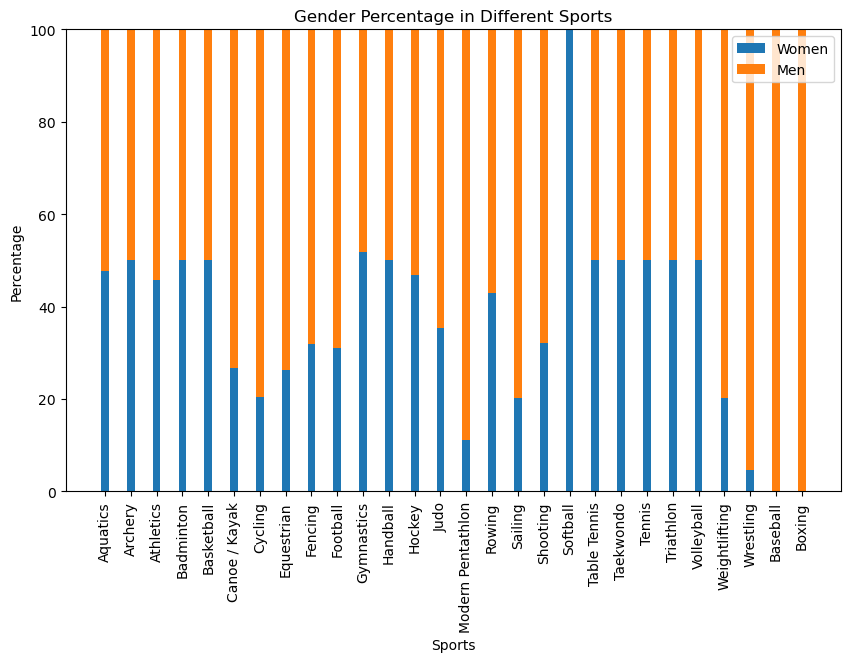

In [32]:
# Counting the number of men in each sport
MenCount = df[df["Gender"] == "Men"].groupby("Sport")["Gender"].count()
MenCount = pd.DataFrame(MenCount)
MenCount.rename(columns={"Gender": "#Men"}, inplace=True)

# Counting the number of women in each sport
WomenCount = df[df["Gender"] == "Women"].groupby("Sport")["Gender"].count()
WomenCount = pd.DataFrame(WomenCount)
WomenCount.rename(columns={"Gender": "#Women"}, inplace=True)

# Combining counts of men and women by sport
result = pd.concat([WomenCount, MenCount], axis=1)
result.fillna(value=0, inplace=True)

# Calculating total count and percentage of women and men in each sport
result['Total'] = result.sum(axis=1)
result["Women Percentage"] = result["#Women"] / result["Total"] * 100
result["Men Percentage"] = result["#Men"] / result["Total"] * 100

# Plotting the gender distribution in different sports
sports = result.index
PercentagesW = result["Women Percentage"]
PercentagesM = result["Men Percentage"]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.3
index = range(len(sports))

# Creating bar plots for women and men percentages
bar1 = plt.bar(index, PercentagesW, bar_width, label='Women')
bar2 = plt.bar(index, PercentagesM, bar_width, label='Men', bottom=PercentagesW)

# Labeling the plot
plt.xlabel('Sports')
plt.ylabel('Percentage')
plt.title('Gender Percentage in Different Sports')
plt.xticks(index, sports, rotation=90)
plt.legend()

# Displaying the plot
plt.show()


**Your Answer:**

### Q5 Geographical Visualization (20 points)
* You should plot a map and color the countries according to the number of medals the country have. The coloring should be correlated with the number of medals. (For example: if a country has more medals than the other countries, then it should be darker than the other ones.)
* In this part, you should use [geopandas](https://geopandas.org/en/stable/index.html). If you need, you can use the below code to download the library.
* Write your comments about the visualization.

In [37]:
# !pip install geopandas
import geopandas as gpd
df['Country'] = df['Country'].replace({'United States': 'United States of America'})

C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_5248\18681623.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\furkngoksu\AppData\Local\Temp\ipykernel_5248\18681623.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


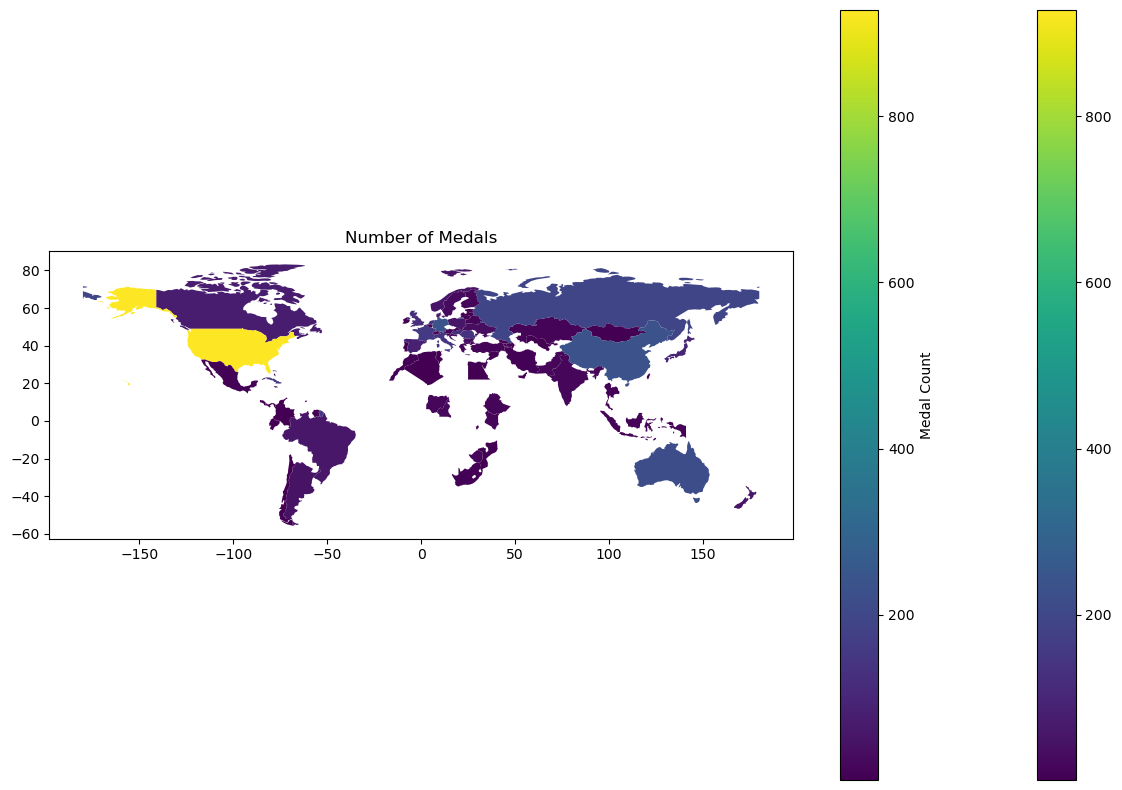

In [42]:
# Grouping by country and counting the number of medals
result = df.groupby("Country")["Medal"].count().reset_index()

# Loading world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging medal count data with world map data
world = world.merge(result, how='left', left_on='name', right_on='Country')

# Plotting the choropleth map with a different colormap ('viridis')
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='Medal', cmap='viridis', legend=True, ax=ax)  # Changed colormap to 'viridis'
ax.set_title('Number of Medals')

# Create a legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=world['Medal'].min(), vmax=world['Medal'].max()))
sm._A = []  # Fake up the array of the scalar mappable
cbar = plt.colorbar(sm)
cbar.set_label('Medal Count')

plt.show()


**Answer here:**